# Stockage de valeur, liste tuple et dictionnaires

## Les listes

De la même façon qu'une chaine de caractère contient un ensemble de caractère, une liste est un contenant pouvant stocker un ensemble de valeur. Contrairement aux `ndarray` de Numpy, les listes sont disponible d'office (ils sont dits `built-in`). On crée une liste en mettant les valeurs entre crochets (brackets) `[]` et en séparant les valeurs avec des virgules (commas) `,`.

In [ ]:
odds = [1, 3, 5, 7]
print('odds are:', odds)

Les listes sont dites *subscriptable*, et on peut accéder à une valeur spécifique par son indice. **Les indices commencent à 0**.

In [ ]:
print('first element:', odds[0])
print('last element:', odds[3])
print('"-1" element:', odds[-1])  # eq. print('"-1" element:', odds[len(odds)])

Les listes sont également des *itérables*, c'est à dire qu'on peut faire passer successivement (itérer) les différentes valeurs qui sont stockés dedans. Il est donc possible de s'en servir dans une boucle `for`:

In [ ]:
for number in odds:
    print(number)

In [ ]:
for char in "odds":
    print(char)

Une différence importante entre une liste de caractère et une liste est qu'on peut modifier les valeurs contenus dans une liste, mais il est impossible de changer un caractère d'une chaine de caractère.

In [6]:
names = ['Curie', 'Darwing', 'Turing']  # typo in Darwin's name
print(id(names))
print('names is originally:', names)
names[1] = 'Darwin'  # correct the name
print(id(names))
print('final value of names:', names)

140208676324416
('names is originally:', ['Curie', 'Darwing', 'Turing'])
140208676324416
('final value of names:', ['Curie', 'Darwin', 'Turing'])


Va fonctionner, mais

In [ ]:
print(hash(names))

In [2]:
name = 'Darwin'
name[0] = 'd'

TypeError: 'str' object does not support item assignment

ne marchera pas.

### Mutabilité

Les données qui peuvent être modifées *en place* sont dits *mutables*, ceux qui ne le peuvent pas sont dits *immutables*. Les chaines de caractères et les nombres sont immutables. Cela ne veut pas dire que les variables avec des chaines de caractères ou des nombres sont constant, mais qu'il n'est pas possible d'en modifier l'objet sous jacent. Il est seulement possible de remplacer l'ancien objet par un qui sera complètement nouveau.

Les listes et les array numpy sont mutables, il est possible de les modifier après leurs création. On peut changer une valeur, en ajouter ou les réordonner. Il est parfois possible de choisir entre une méthode qui va modifier l'objet en place ou une fonction qui va renvoyer un nouvel objet.

In [9]:
my_list = [0, 7, 1, 3]
my_list2 = list(my_list)
my_list2.sort() # cette méthode ne renvoie rien, mais ordonne la liste en place
print(my_list)
print(my_list2)

[0, 7, 1, 3]
[0, 1, 3, 7]


In [10]:
my_list = [0, 7, 1, 3]
sorted_list = sorted(my_list) # cette fonction renvoie une nouvelle collection ordonnée sans modifier my_list
print(sorted_list)
print(my_list)

[0, 1, 3, 7]
[0, 7, 1, 3]


Il faut toujours être très attentif aux méthodes et fonctions qui modifient les objet en place, cela mène parfois à des effets de bords indésirables. De plus, si deux variables réfère au même objet et que celui ci est mutable, le modifier à travers une variable **impactera les deux variables** !

In [11]:
salsa = ['peppers', 'onions', 'cilantro', 'tomatoes']
my_salsa = salsa        # <-- my_salsa and salsa point to the *same* list data in memory
my_salsa[0] = 'hot peppers'
print('Ingredients in my salsa:', salsa)

('Ingredients in my salsa:', ['hot peppers', 'onions', 'cilantro', 'tomatoes'])


<div class="alert alert-info">
    <b>Vérifier l'identité d'un objet:</b>
    il est possible de vérifier que deux variables pointe le même objet avec `id(obj)`.
<\div>

In [12]:
print(id(my_salsa), id(salsa))

(140208676324344, 140208676324344)


### Listes imbriqués

Une liste peut contenir comme valeurs n'importe quel objet Python, dont d'autres listes.

Par exemple, si on représente les ingrédients disponibles sur chaques niveau d'une étagère d'une épicerie:

In [14]:
x = [['pepper', 'zucchini', 'onion'],
     ['cabbage', 'lettuce', 'garlic'],
     ['apple', 'pear', 'banana']]

Pour visualiser l'indexation d'une liste imbriquée :

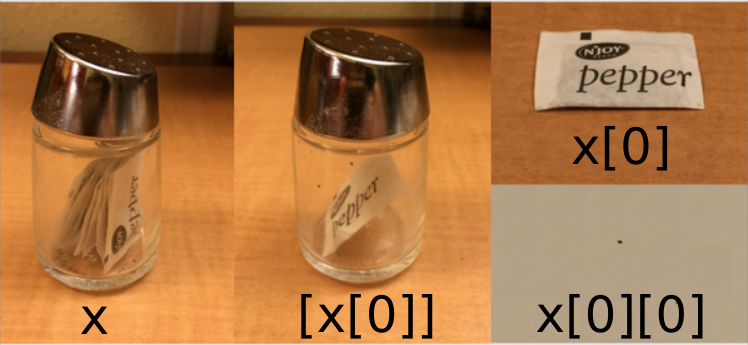

Appliqué à notre exemple :

In [15]:
print([x[0]])

[['pepper', 'zucchini', 'onion']]


In [16]:
print(x[0])

['pepper', 'zucchini', 'onion']


In [17]:
print(x[0][0])

pepper


### Listes hétérogènes

Contrairement aux array numpy, les listes peuvent contenir des éléments de différents types. Par exemple :

In [ ]:
import numpy as np

In [ ]:
sample = [10, 12.5, 'Unknown', [7, "Henry"], np.zeros((3, 2))]
sample

Nous avons vu qu'il était possible de modifier une valeur existante d'une liste. Il existe d'autres méthode modifiant une liste :

In [20]:
odds = []
odds.append(11)
odds.append(2)
print('odds after adding a value:', odds)
odds.extend([13, 15, 17])
print('odds after adding values:', odds)

('odds after adding a value:', [11, 2])
('odds after adding values:', [11, 2, 13, 15, 17])


In [21]:
removed_element = odds.pop(0)
print('odds after removing the first element:', odds)
print('removed_element:', removed_element)

('odds after removing the first element:', [2, 13, 15, 17])
('removed_element:', 11)


In [22]:
odds.reverse()
print('odds after reversing:', odds)

('odds after reversing:', [17, 15, 13, 2])


Attention quand vous modifiez une liste en place : si deux variables pointent vers la même liste, modifier la première variable changera la seconde.

In [23]:
odds = [1, 3, 5, 7]
primes = odds
primes.append(2)
print('primes:', primes)
print('odds:', odds)

('primes:', [1, 3, 5, 7, 2])
('odds:', [1, 3, 5, 7, 2])


Dans ce cas, deux variables (`odds` et `primes`) pointent le même objet.

In [24]:
print(id(odds), id(primes))
print(id(odds) == id(primes))

(140208676307384, 140208676307384)
True


In [25]:
odds = [1, 3, 5, 7, 7]
primes = list(odds) # renvoie une *nouvelle* liste
primes.append(2)
print('primes:', primes)
print('odds:', odds)

('primes:', [1, 3, 5, 7, 7, 2])
('odds:', [1, 3, 5, 7, 7])


In [26]:
print(id(odds), id(primes))
print(id(odds) == id(primes))

(140208676309760, 140208674842096)
False


## Exercices
### D'une chaine de caractère vers une liste

Utilisez une boucle for pour transformer le texte "hello" en une liste de lettre `["h", "e", "l", "l", "o"]`

In [27]:
my_str = "hello"

In [28]:
my_list = []
for char in my_str:
    my_list.append(char)
my_list

['h', 'e', 'l', 'l', 'o']

In [29]:
my_list = list(my_str)
my_list

['h', 'e', 'l', 'l', 'o']

In [30]:
my_list = ["h", "e", "l", "l", "o"]
my_list

['h', 'e', 'l', 'l', 'o']

### Opérateur mathématiques et listes.

Les opérateurs mathématiques (`+`, `*`) se comportent différement selon les objets sur lesquels ils s'appliquent. Par exemple, sur une liste ou une chaine de caractère, `+` est une opération de *concaténation*, ce qui va "coller" les valeurs les unes après les autres.

In [31]:
print("Hello " + "World")
print([5, 3, 7] + [3, 7, 3])

Hello World
[5, 3, 7, 3, 7, 3]


Que fais l'opérateur `*` ?

```python
counts = [2, 4, 6, 8, 10]
repeats = counts * 2
print(repeats)
```

1. `[2, 4, 6, 8, 10, 2, 4, 6, 8, 10]`
2. `[4, 8, 12, 16, 20]`
3. `[[2, 4, 6, 8, 10],[2, 4, 6, 8, 10]]`
4. `[2, 4, 6, 8, 10, 4, 8, 12, 16, 20]`


In [32]:
counts = [1,2,3]
repeats = counts * 2
print(repeats)

[1, 2, 3, 1, 2, 3]


## Les tuples

Les tuples sont le pendant immutables des listes. Il est possible de les créer en retirant les crochets `[]` et de les remplacer par des parenthèses `()`, ou d'utiliser la fonction `tuple` sur un itérable.

In [34]:
tuple(odds)

(1, 3, 5, 7, 7)

In [35]:
my_tuple = (5, 7, 3)
my_tuple

(5, 7, 3)

Contrairement aux listes, il n'est pas possible de modifier un tuple en place. A noter que les parenthèses sont optionnelles (mais recommandés) :

In [36]:
my_tuple = 5, 7, 3
my_tuple

(5, 7, 3)

#### Mutabilité et hashabilité:

En informatique, et plus particulièrement en cryptographie, on appelle condensat (hash) un nombre calculé depuis une valeur quelconque, unique et invariable pour cette valeur. Deux valeurs égales partageront un même hash, deux valeurs différentes auront dans la mesure du possible des hash différents. (depuis [Zeste de Savoie](https://zestedesavoir.com/tutoriels/954/notions-de-python-avancees/1-starters/3-mutables-hashables/#3-3-hashables))

Les objets mutables ne peuvent pas être utilisé comme identifiant (comme clé). En effet, un objet mutable peut évoluer au cours du temps. Il est impossible de lui donner une valeur *invariante* qui, en même temps, correspond à la valeur de l'objet mutable.

Des types immutables peuvent contenir des mutables. Dans ce cas, les valeurs contenues dans le conteneurs étant non-hashable, il ne sera pas possible de hasher le conteneur.

In [45]:
odds = 1,2,3 # tuple
#odds = list(odds) # hash list is not possible
odds_b = 1,2,4
print(hash(odds))
print(hash(odds_b))

2528502973977326415
2528502973976161366


In [39]:
hash(my_tuple)

7573299797655308470

In [40]:
my_tuple[0] = 6

TypeError: 'tuple' object does not support item assignment

C'est les virgules qui indiquent le tuple, pas les parenthèses.

### Les dictionnaires

Les dictionnaires sont une collection de valeurs associés à une clé. On les crée avec des accolades `{key1: value1, key2: value2}`, ou avec la fonction `dict`.

In [46]:
{("salle01", "temperature"): 3,
 ("salle02", "temperature"): 34}

{('salle01', 'temperature'): 3, ('salle02', 'temperature'): 34}

In [52]:
my_dict = {"key1": [4, 7, 3],
           8.3: 87,
           (3, 4): "test"}
print(my_dict)
print(my_dict[8.3])
print(my_dict["key1"])

{'key1': [4, 7, 3], (3, 4): 'test', 8.3: 87}
87
[4, 7, 3]


les dictionnaires sont mutables

In [ ]:
my_dict["key1"] = 6
print(my_dict)

Il est possible d'ajouter une nouvelle clé de la même façon qu'on modifierai une clé existante

In [53]:
my_dict["key2"] = 67
print(my_dict)

{'key2': 67, 'key1': [4, 7, 3], (3, 4): 'test', 8.3: 87}


Depuis python3.6, les dictionnaires sont ordonnées.

Itérer sur un dictionnaire va itérer sur ses clés.

In [54]:
for key in my_dict:
    print(key, my_dict[key])

('key2', 67)
('key1', [4, 7, 3])
((3, 4), 'test')
(8.3, 87)


Il est possible d'accéder directement aux clés, aux valeurs ou aux tuples clés - valeurs avec:

In [55]:
{None: 4}

{None: 4}

In [56]:
print(my_dict.keys())
print(my_dict.values())
print(my_dict.items())

['key2', 'key1', (3, 4), 8.3]
[67, [4, 7, 3], 'test', 87]
[('key2', 67), ('key1', [4, 7, 3]), ((3, 4), 'test'), (8.3, 87)]


In [57]:
dict([(2, "5"), ("key1", 7)])

{2: '5', 'key1': 7}

### Bonus : listes et dictionnaires en intension

Pour créer une liste ou un dictionnaires à partir d'une autre collection, la syntaxe peut-être un peu laborieuse :

In [58]:
old_collection = range(6)

In [59]:
new_list = []
for value in old_collection:
    new_list.append(value ** 2)
print(new_list)

[0, 1, 4, 9, 16, 25]


Une façon plus concise est d'utiliser des listes en intension :

In [60]:
print([value ** 2 for value in old_collection])

[0, 1, 4, 9, 16, 25]


Une syntaxe similaire existe pour les dictionnaires en intension :

In [61]:
print({value: value ** 2 for value in old_collection})

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}


Il est aussi possible de filtrer les valeurs directement :

In [62]:
print({value: value ** 2
       for value in old_collection
       if value % 2 == 0})

{0: 0, 2: 4, 4: 16}


[***Prochaine section***](fonda_06-app_multiples_fichiers.ipynb)